# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2025-05-20

Before we get started, let’s define some parameters in Python that we
can use to change the workflow:

In [1]:
id = 'stars'
address = 'Haskell Indian Nations University, Lawrence, KS, United States'
amenity_type = 'university'
long_name = 'Haskell Indian Nations University Campus, Lawrence, KS'
short_name = 'Haskell'
map_filename = 'haskell.html'

## Get started with map-making using open-sources tools

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-video"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Check out our demo video!</div></div><div class="callout-body-container callout-body"><p>Check out our video demo for adding a map to your portfolio:</p>
<div
style="position: relative; width: 100%; height: 0; padding-top: 56.2500%;
 padding-bottom: 0; box-shadow: 0 2px 8px 0 rgba(63,69,81,0.16); margin-top: 1.6em; margin-bottom: 0.9em; overflow: hidden;
 border-radius: 8px; will-change: transform;">
<p><iframe loading="lazy" style="position: absolute; width: 100%; height: 100%; top: 0; left: 0; border: none; padding: 0;margin: 0;"
    src="https:&#x2F;&#x2F;www.canva.com&#x2F;design&#x2F;DAGE2DNLXO0&#x2F;DLDo07It1rGqzeYgbQ6Skw&#x2F;watch?embed" allowfullscreen="allowfullscreen" allow="fullscreen">
</iframe></p>
</div>
<p><a href="https:&#x2F;&#x2F;www.canva.com&#x2F;design&#x2F;DAGE2DNLXO0&#x2F;DLDo07It1rGqzeYgbQ6Skw&#x2F;watch?utm_content=DAGE2DNLXO0&amp;utm_campaign=designshare&amp;utm_medium=embeds&amp;utm_source=link" target="_blank" rel="noopener">DEMO:
Add a map to your portfolio</a> by ESIIL</p></div></div>

### About Spatial Vector Data

Vector data are composed of discrete geometric locations (x and y
values, or latitude and longitude) that define the “shape” of the
spatial object. The organization of the vertices determines the type of
vector that you are working with. There are three fundamental types of
vector data:

**Points:** Each individual point is defined by a single x, y
coordinate. Examples of point data include: sampling locations, the
location of individual trees or the location of plots.

**Lines:** Lines are composed of many (at least 2) vertices, or points,
that are connected. For instance, a road or a stream may be represented
by a line. This line is composed of a series of segments, each bend in
the road or stream represents a vertex that has defined x, y location.

**Polygons:** A polygon consists of 3 or more vertices that are
connected and closed. Thus, the outlines of plot boundaries, lakes,
oceans, and states or countries are often represented by polygons.

<figure>
<img
src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png"
alt="There are three types of vector data – point, line, and polygon" />
<figcaption aria-hidden="true">There are three types of vector data –
point, line, and polygon</figcaption>
</figure>

> **Tip**
>
> Read more about working with spatial data using Python in our Intro to
> Earth Data Science,
> [here](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/).

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing some libraries to have access to all
the code you need.

> **Tip**
>
> To run code in Codespaces, click on the play button in the upper left
> corner of the code you want to run. You may be asked to “Select a
> kernel”. If you press <kbd>Return</kbd> or click on `base` up at the
> top, that should select the default kernel.

In [2]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm

### Search for a point of interest

You can use the `osmnx` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the United Tribes
Technical College campus in North Dakota. The address in here,
`'United Tribes Technical College, Bismarck, ND, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down.

> **Tip**
>
> You can use the [Open Street Maps](https://www.openstreetmap.org/)
> website to fine-tune your address before you copy it into your code.

We are also specifying that we want it to be tagged as a
`'college' type of`‘amenity’\` type. You might have to try a couple
different searches with different addresses and/or tags to get the
address you want, just like if you are using a map website or app.

> **Tip**
>
> Check out the [list of all the different amenity types available on
> Open Street Maps](https://wiki.openstreetmap.org/wiki/Key:amenity)!
> Different amenity types might be different types of vector data, such
> as a **point** location or a building footprint **polygon**.

In [3]:
# Search for United Tribes Technical College
osm_gdf = osm.features_from_address(
    address,
    {'amenity': [amenity_type]},
    dist=1000)
osm_gdf

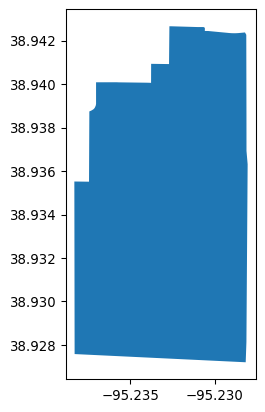

In [4]:
osm_gdf.plot()

We have a map of **?meta:params.plot_title**!

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [5]:
# Plot boundary
osm_map = osm_gdf.hvplot(
    # Givethe map a descriptive title
    title=long_name,
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(osm_map, map_filename)

# Display the map
osm_map

### Download your map from Codespaces

If you are doing this activity on GitHub Codespaces or another cloud
service, you will need to download the map you created:

1.  Open the `Folders` tab on the left hand side
2.  Right-click on `haskell.html` (or whatever you named your file)
3.  Select `Download...`

This should download your map.

### Place your map in your webpage

You are now ready to upload your map to your portfolio repository and
place it in your webpage. Because it is HTML and not an image, you will
need to use the following HTML to get it on your page:

``` markdown
<embed type="text/html" src="haskell.html" width="600" height="600">
```

\<embed type=“text/html” src=“haskell.html” width=“600” height=“600”\>

> **Important**
>
> Make sure to make the `width` and `height` of your `embed` element
> larger than the `frame_width` and `frame_height` of your plot, or it
> will get cut off!